<a href="https://colab.research.google.com/github/erenuluer/ai_ml_samples/blob/main/fmnist_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7620 - loss: 0.6705 - val_accuracy: 0.8429 - val_loss: 0.4312
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8556 - loss: 0.3904 - val_accuracy: 0.8563 - val_loss: 0.4014
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8672 - loss: 0.3593 - val_accuracy: 0.8598 - val_loss: 0.3818
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8795 - loss: 0.3251 - val_accuracy: 0.8677 - val_loss: 0.3713
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8854 - loss: 0.3086 - val_accuracy: 0.8692 - val_loss: 0.3656
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8894 - loss: 0.2949 - val_accuracy: 0.8766 - val_loss: 0.3457
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8951 - loss: 0.2834 - val_accuracy: 0.8793 - val_loss: 0.3463
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8975 - loss: 0

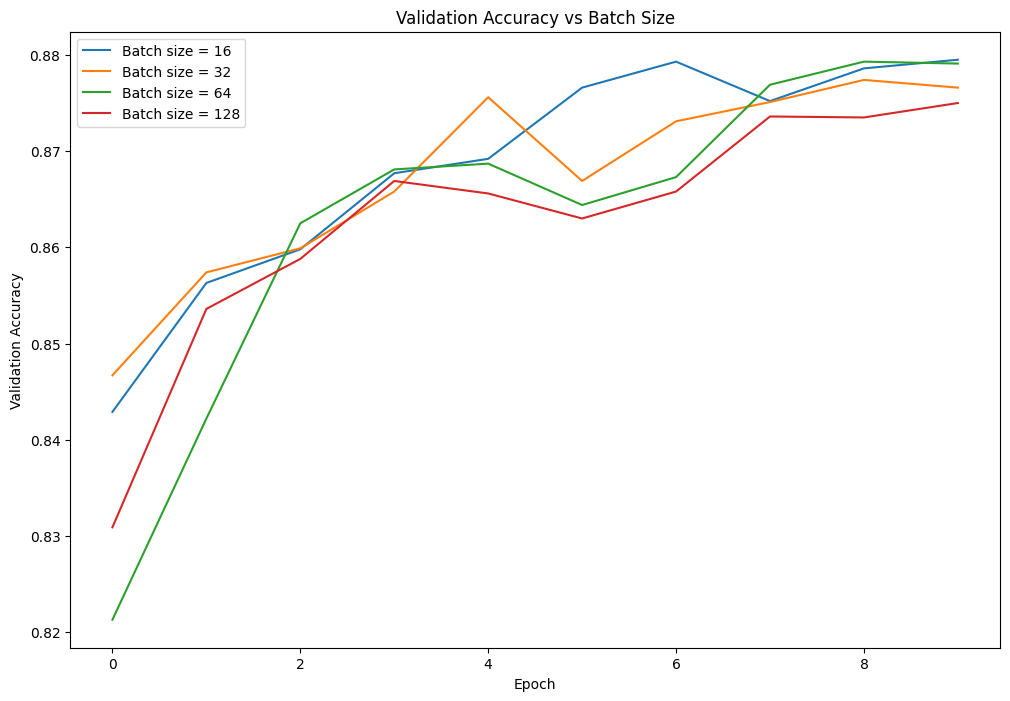

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models

# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize and reshape images
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

# Define batch sizes to experiment with
batch_sizes = [16, 32, 64, 128]
history_dict = {}

# Loop over batch sizes
for batch_size in batch_sizes:
    # Define the model
    model = models.Sequential([

        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10,
                        batch_size=batch_size,
                        validation_data=(test_images, test_labels))

    # Store history
    history_dict[batch_size] = history

# Plot results
plt.figure(figsize=(12, 8))

for batch_size, history in history_dict.items():
    plt.plot(history.history['val_accuracy'], label=f'Batch size = {batch_size}')

plt.title('Validation Accuracy vs Batch Size')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


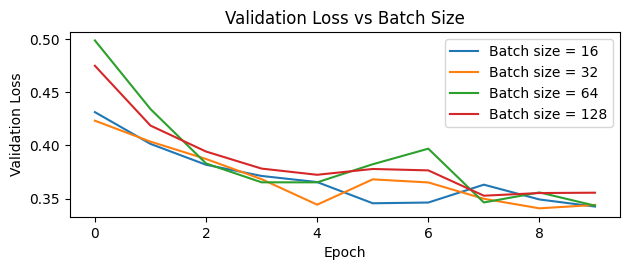

In [10]:
plt.subplot(2, 1, 2)
for batch_size, history in history_dict.items():
    plt.plot(history.history['val_loss'], label=f'Batch size = {batch_size}')
plt.title('Validation Loss vs Batch Size')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
